<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/CDA_TimeSeries_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Séries Temporais e Forecast

In [126]:
#@markdown imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import periodogram


# CASO: Série Temporal de Temperatura Global. 

Os dados são obtidos a partir da análise GISS Surface Temperature (GISTEMP) e do componente global do Climate at a Glance (GCAG) com  média mensal global em graus Celsius de 1880 até o presente.

Link: https://datahub.io/core/global-temp/r/monthly.csv



# 1. Acesse e Explore os Dados

Acesse os dados. Selecione somente os dados de temperatura que têm como fonte o *Climate at a Glance*. Crie o índice da Série temporal com o atributo `Date`.

Qual a data mais antiga disponível e a média de temperatura de toda a série? 

In [ ]:
# seu código

# 2. Visualmente, verifique se a Série é Estacionária

Plot os dados. Você diria que essa é uma série estacionária? Verifique as médias e variâncias para os períodos anteriores a 1900, entre 1900 e 2000, e depois de 2000. O que você conclui?   



In [ ]:
# seu código

# 3. Distribuição dos dados

Os dados seguem que tipo de distribuição? 

In [ ]:
# seu código

# 4. Modelo Ingênuo de Médias (**RESOLVIDO**)

Ao empregar um Modelo Ingênuo de Médias qual seria a sua melhor previsão para o temperatura no final da década de 2020? 



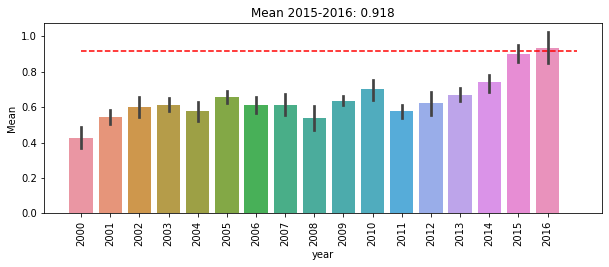

In [135]:
fig, ax = plt.subplots(1,1,figsize=(10,3.5))

data = df[ df.index > pd.to_datetime('2000-01-01', format='%Y-%m-%d') ].copy()
data['year'] = data.index.year
sns.barplot(x='year', y='Mean', data=data, ax=ax)
plt.xticks(rotation=90)

plt.hlines( data[ data.index >= pd.to_datetime('2015-01-01', format='%Y-%m-%d') ].Mean.mean(), 0, 17, color='r', linestyle='--' )
plt.title('Mean 2015-2016: ' + str( np.round( data[ data.index >= pd.to_datetime('2015-01-01', format='%Y-%m-%d') ].Mean.mean(), 3 ) ) )
plt.show()

# 5. Modelo Ingênuo de Regressão (**RESOLVIDO PARCIAL**)

Qual a previsão para daqui 10 anos a partir de um Modelo Ingênuo de Regressão considerando apenas dados de 2020 para cá?

In [136]:
#
# criando os time_steps... resolvido
#
data = df[ df.index > pd.to_datetime('2000-01-01', format='%Y-%m-%d') ].copy()
data = data.sort_index()

data['time'] = np.arange(len(data))
data = data.dropna()
data.head()

,Source,Mean,time
Date,,,
2000-01-06,GCAG,0.3467,0
2000-02-06,GCAG,0.5439,1
2000-03-06,GCAG,0.5561,2
2000-04-06,GCAG,0.6311,3
2000-05-06,GCAG,0.4657,4


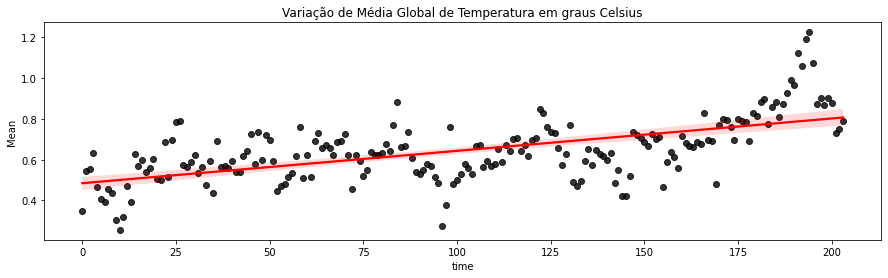

In [137]:
plt.figure(figsize=(15,4))

plt.title('Variação de Média Global de Temperatura em graus Celsius')
sns.regplot(x='time', y='Mean', data=data, scatter_kws=dict(color='k'), line_kws=dict(color='red'))

plt.show()

## Modelo de Regressão

In [ ]:
# seu código


## Predict 120 meses a frente... 

In [ ]:
# seu código

# 6. Decomposição de Séries Temporais

Decompomha a Série. Que componente é mais presente?

In [142]:
#@markdown plot_series
def plot_series(values, decomp_type='additive', max_lags=30):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline 
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type, freq=1)

  ax[0].plot(decomposition.trend)
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3)

  plot_acf(values, ax=ax[0], lags = max_lags)
  plot_pacf(values, ax=ax[1], lags = max_lags)

  periods = periodogram(values)
  # print(periods)
  ax[2].bar(x=range(len(periods)), height=periods)
  plt.title('Periodogram')

  plt.tight_layout()
  plt.show()

  warnings.filterwarnings('once')

  return 

 




In [ ]:
# seu código